In [1]:
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d as mpl3d
from scipy import signal, stats, linalg, fft

# import our 'specsens' package with the help of 'sys'
import sys
sys.path.insert(0, '..')
import specsens as ss

In [2]:
# from numpy.random import SeedSequence, default_rng

# ss = SeedSequence(12345)
# # ss = SeedSequence()

# # Spawn off 10 child SeedSequences to pass to child processes.
# child_seeds = ss.spawn(10)
# streams = [default_rng(s) for s in child_seeds]
# print(streams[1].random())

# child_seeds = ss.spawn(10)
# streams = [default_rng(s) for s in child_seeds]
# print(streams[1].random())

In [3]:
# Narrow band energy detector simulation

# _ = ss.sim_narrow(
#     gens=100,  # generations, number of environments (outer loop)
#     itrs=300,  # iterations, number of tests in each environment (inner loop)
#     f_sample=1e6,  # in Hz
#     signal_power=0.0,  # in dB
#     noise_power=13.0,  # in dB
#     length_sec=0.001024,  # length of each sample in seconds
#     theo_pfa=0.1,  # probability of false alarm
#     noise_uncert=0.0,  # standard deviation of the noise normal distribution
#     seed=123)

---- Simulation parameter ----
Generations:    300
Iterations:     300
Total iters:    90000
Signal power:   0.00 dB
Noise power:    13.00 dB
Noise uncert:   0.00 dB
SNR:            -13.00 dB
Signal length:  0.001024 sec
Signal samples: 1024
---- Simulation stats theory ----
Prob false alarm 0.1000
Prob detection   0.6145
Threshold        21253.8895
---- Running simulation ----
Using 8 processes on 8 cores


100%|██████████| 300/300 [00:08<00:00, 33.86it/s]


---- Simulation stats ----
Prob false alarm theory 0.1000
Prob false alarm sim    0.1035
Prob detection theory   0.6145
Prob detection sim      0.6160


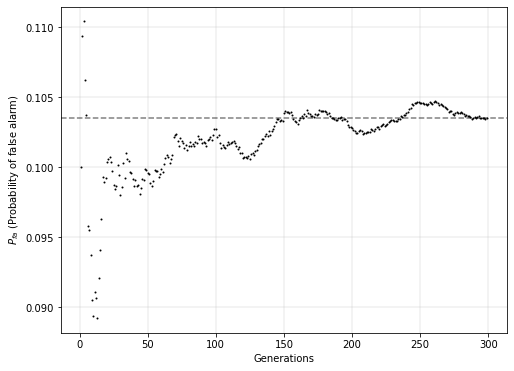

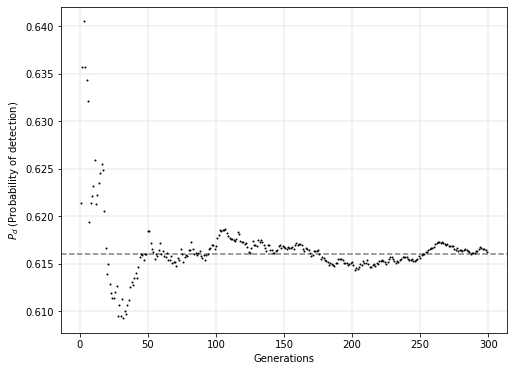

In [4]:
# Narrow band energy detector simulation

_ = ss.sim_narrow_par(
    gens=300,  # generations, number of environments (outer loop)
    itrs=300,  # iterations, number of tests in each environment (inner loop)
    f_sample=1e6,  # in Hz
    signal_power=0.0,  # in dB
    noise_power=13.0,  # in dB
    length_sec=0.001024,  # length of each sample in seconds
    theo_pfa=0.1,  # probability of false alarm
    noise_uncert=0.0)  # standard deviation of the noise normal distribution

In [5]:
# import numpy as np
# import matplotlib.pyplot as plt
# import time


# def runtime_stats(current_time, total_itr, current_itr):
#     if current_time is None:  # first iteration cant predict time
#         current_time = time.time()
#         return float('inf'), 0.0, current_time
#     delta_time = time.time() - current_time
#     current_time = time.time()
#     remaining_itr = total_itr - current_itr
#     remaining_time = delta_time * remaining_itr
#     percent_done = current_itr / total_itr * 100.0
#     return remaining_time, percent_done, current_time


# def print_convergence(gens, pfas, pds):
#     plt.figure(figsize=(8, 6))
#     plt.grid(linewidth=0.3)
#     for i in range(1, gens):
#         inter = np.mean(pfas[0:i])
#         plt.plot(i, inter, 'ko', markersize=1, aa=True)
#     plt.axhline(np.mean(pfas), xmin=0., xmax=1., color='k', ls='--', alpha=0.5)
#     plt.xlabel(r'Generations')
#     plt.ylabel(r'$P_{fa}$ (Probability of false alarm)')
#     plt.show()
#     plt.figure(figsize=(8, 6))
#     plt.grid(linewidth=0.3)
#     for i in range(1, gens):
#         inter = np.mean(pds[0:i])
#         plt.plot(i, inter, 'ko', markersize=1, aa=True)
#     plt.axhline(np.mean(pds), xmin=0., xmax=1., color='k', ls='--', alpha=0.5)
#     plt.xlabel(r'Generations')
#     plt.ylabel(r'$P_d$ (Probability of detection)')
#     plt.show()


# def print_distibution(eng_sig, eng_noise, bins=100):
#     plt.figure(figsize=(8, 6))
#     plt.title(r'Distribution when signal present')
#     plt.hist(eng_sig, bins=bins)
#     plt.show()
#     print('Sig Mean=%.3f, Standard Deviation=%.3f' %
#           (np.mean(eng_sig), np.std(eng_sig)))

#     plt.title(r'Distribution when signal absent')
#     plt.hist(eng_noise, bins=bins)
#     plt.show()
#     print('Noise Mean=%.3f, Standard Deviation=%.3f' %
#           (np.mean(eng_noise), np.std(eng_noise)))